---
# <<<< Financiamiento Privado en Mercado de Capitales >>>> 
---

In [1]:
# Comenzamos importando las librerias a utilizar por el momento.

import numpy as np   # Importamos librerias de calculo
import pandas as pd  # Importamos librerias de uso de tablas o los dataframes
import seaborn as sns # Importamos librerias de graficos
%matplotlib inline
import matplotlib.pyplot as plt

Direccion del dataset

https://datos.gob.ar/dataset/sspm-financiamiento-privado-mercado-capitales/archivo/sspm_170.1

In [2]:
# Ubicar el dataset, cargarlo y mostrarlo.
url='https://raw.githubusercontent.com/NestorDiazDataSC/Analisis_de_Datos/main/Financiamiento_Privado_Mercado_Capitales/financiamiento-privado-mercado-capitales-dolares.csv'

df= pd.read_csv(url)
df

,indice_tiempo,financiamiento_mercado_capitales_ge_on_vcp,financiamiento_mercado_capitales_ge_ff,financiamiento_mercado_capitales_ge_acciones,financiamiento_mercado_capitales_ge_cdcp,financiamiento_mercado_capitales_ge_total,financiamiento_mercado_capitales_pymes_on_vcp,financiamiento_mercado_capitales_pymes_ff,financiamiento_mercado_capitales_pymes_acciones,financiamiento_mercado_capitales_pymes_cdcp,...,manufacturas_origen_agropecuario,manufacturas_origen_industrial,manufacturas_actividades_empresariales,manufacturas_papel_celulosa,manufacturas_servicios_informaticos,manufacturas_tecnologia,manufacturas_telecomunicaciones,manufacturas_transporte_energia_electrica,manufacturas_transporte_gas,manufacturas_transporte_pasajeros_peajes
0,2007-01-01,3.000000e+08,2.642723e+08,1.017422e+07,1.809615e+06,5.762561e+08,2.500000e+05,3.042050e+06,NaN,1.454448e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,2007-02-01,NaN,1.053984e+08,4.302251e+08,1.221314e+06,5.368448e+08,NaN,7.508643e+06,NaN,1.233830e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-03-01,NaN,1.704575e+08,NaN,2.353346e+06,1.728108e+08,3.215434e+05,2.615312e+07,NaN,1.546019e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-04-01,1.718089e+08,1.197570e+08,7.045493e+07,3.086170e+06,3.651070e+08,NaN,1.486692e+06,NaN,1.224757e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-05-01,1.325000e+09,1.687936e+08,NaN,2.176995e+06,1.495971e+09,NaN,7.814367e+06,NaN,1.292232e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,2022-03-01,9.232671e+07,6.933919e+07,NaN,NaN,1.616659e+08,4.134795e+06,3.394862e+06,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.459381,NaN,NaN,NaN
183,2022-04-01,1.029188e+08,7.868771e+07,NaN,NaN,1.816066e+08,1.854224e+07,1.371023e+07,NaN,NaN,...,0.036494,0.026766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,2022-05-01,4.408777e+08,5.636723e+07,NaN,NaN,4.972449e+08,6.854434e+06,4.163517e+06,NaN,NaN,...,0.014184,NaN,0.001125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,2022-06-01,4.000784e+08,1.073972e+08,NaN,NaN,5.074756e+08,3.792692e+07,4.987449e+06,NaN,NaN,...,0.014540,0.040982,NaN,NaN,NaN,NaN,0.009022,NaN,NaN,NaN


In [3]:
df.columns # Para ver las columnas del Dataset, para esta parte del analisis voy a usar las primeras 12 columnas que tienen datos sobre el financiamiento.

Index(['indice_tiempo', 'financiamiento_mercado_capitales_ge_on_vcp',
       'financiamiento_mercado_capitales_ge_ff',
       'financiamiento_mercado_capitales_ge_acciones',
       'financiamiento_mercado_capitales_ge_cdcp',
       'financiamiento_mercado_capitales_ge_total',
       'financiamiento_mercado_capitales_pymes_on_vcp',
       'financiamiento_mercado_capitales_pymes_ff',
       'financiamiento_mercado_capitales_pymes_acciones',
       'financiamiento_mercado_capitales_pymes_cdcp',
       'financiamiento_mercado_capitales_pymes_pagares',
       'financiamiento_mercado_capitales_pymes_total',
       'financiamiento_mercado_capitales_total_general',
       'tasa_interes_vdf_senior', 'tasa_interes_cpdp', 'tasa_interes_cpda',
       'emisiones_ge_on', 'emisiones_ge_ff', 'emisiones_ge_acc',
       'emisiones_ge_cpd', 'emisiones_ge_total', 'emisiones_pymes_on',
       'emisiones_pymes_ff', 'emisiones_pymes_acc', 'emisiones_pymes_cpd',
       'emisiones_pymes_pag', 'emisiones_pymes_

In [4]:
# Elimino las columnas que no voy a utilizar del dataset
df = df.drop(df.columns[13:77], axis=1)

In [5]:
df.columns # Verifico que quedaron solo las columnas que necesito analizar

Index(['indice_tiempo', 'financiamiento_mercado_capitales_ge_on_vcp',
       'financiamiento_mercado_capitales_ge_ff',
       'financiamiento_mercado_capitales_ge_acciones',
       'financiamiento_mercado_capitales_ge_cdcp',
       'financiamiento_mercado_capitales_ge_total',
       'financiamiento_mercado_capitales_pymes_on_vcp',
       'financiamiento_mercado_capitales_pymes_ff',
       'financiamiento_mercado_capitales_pymes_acciones',
       'financiamiento_mercado_capitales_pymes_cdcp',
       'financiamiento_mercado_capitales_pymes_pagares',
       'financiamiento_mercado_capitales_pymes_total',
       'financiamiento_mercado_capitales_total_general'],
      dtype='object')

In [6]:
# Renombro las columnas.
df.columns = ['Fecha', 'ON GE', 'FF GE', 'ACC GE', 'CHPD GE', 'TOTAL GE', 'ON PyMES', 'FF PyMES', 'ACC PyMES', 'CHPD PyMES','PAG PyMES','TOTAL PyMES', 'TOTAL']

Descripcion de las columnas del dataset, los valores numericos estan expresados en dolares.

*   ON = Obligaciones negociables emitidas, monto
*   FF = Fideicomisos Financieros, emitidos
*   ACC = Acciones emitidas
*   CHPD = Cheques de pago diferidos emitidos
*   PAG = Pagares emitidos
*   GE = Grandes Empresas
*   PyMES = Pequeñas y medianas empresas


In [7]:
df.sample(5)

,Fecha,ON GE,FF GE,ACC GE,CHPD GE,TOTAL GE,ON PyMES,FF PyMES,ACC PyMES,CHPD PyMES,PAG PyMES,TOTAL PyMES,TOTAL
66,2012-07-01,8.992038e+07,2.189890e+08,NaN,1.426049e+06,3.103354e+08,1.876380e+06,7.671873e+06,NaN,4.417048e+07,NaN,5.371874e+07,3.640542e+08
110,2016-03-01,1.522513e+09,1.281438e+08,NaN,7.565716e+05,1.651414e+09,4.032258e+06,NaN,NaN,8.253250e+07,365114.08,8.692987e+07,1.738343e+09
29,2009-06-01,1.688689e+08,4.670460e+08,NaN,6.175070e+05,6.365324e+08,NaN,1.036258e+06,NaN,1.750912e+07,NaN,1.854538e+07,6.550778e+08
60,2012-01-01,1.500417e+08,1.979224e+08,NaN,2.672785e+06,3.506369e+08,NaN,1.082600e+07,NaN,3.091117e+07,NaN,4.173717e+07,3.923741e+08
104,2015-09-01,5.366813e+08,1.968666e+08,5.930943e+06,9.422166e+05,7.404210e+08,9.020960e+06,5.465000e+06,NaN,1.806225e+08,NaN,1.951084e+08,9.355294e+08


In [8]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha        187 non-null    object 
 1   ON GE        179 non-null    float64
 2   FF GE        186 non-null    float64
 3   ACC GE       50 non-null     float64
 4   CHPD GE      139 non-null    float64
 5   TOTAL GE     186 non-null    float64
 6   ON PyMES     113 non-null    float64
 7   FF PyMES     117 non-null    float64
 8   ACC PyMES    2 non-null      float64
 9   CHPD PyMES   140 non-null    float64
 10  PAG PyMES    35 non-null     float64
 11  TOTAL PyMES  184 non-null    float64
 12  TOTAL        186 non-null    float64
dtypes: float64(12), object(1)
memory usage: 19.1+ KB


(187, 13)

In [9]:
df = df.drop(columns=['TOTAL GE'])
df = df.drop(columns=['TOTAL PyMES'])
df = df.drop(columns=['TOTAL'])

In [10]:
df.isnull().sum() # Para ver cuantos valores nulos hay en cada columna.

Fecha           0
ON GE           8
FF GE           1
ACC GE        137
CHPD GE        48
ON PyMES       74
FF PyMES       70
ACC PyMES     185
CHPD PyMES     47
PAG PyMES     152
dtype: int64

In [11]:
# En estos casos de abajo separados de abajo, reemplazo los valores nulos por "0" puesto que son nulos debido a que no hubo
# emisión en esos casos.
df["ON GE"].fillna(0, inplace = True)
df["FF GE"].fillna(0, inplace = True)
df["ACC GE"].fillna(0, inplace = True)
df["CHPD GE"].fillna(0, inplace = True)
df["ON PyMES"].fillna(0, inplace = True)
df["FF PyMES"].fillna(0, inplace = True)
df["ACC PyMES"].fillna(0, inplace = True)
df["CHPD PyMES"].fillna(0, inplace = True)
df["PAG PyMES"].fillna(0, inplace = True)

In [12]:
df.isnull().sum() # Para ver los valores nulos de cada columna.

Fecha         0
ON GE         0
FF GE         0
ACC GE        0
CHPD GE       0
ON PyMES      0
FF PyMES      0
ACC PyMES     0
CHPD PyMES    0
PAG PyMES     0
dtype: int64

In [13]:
df.corr()

,ON GE,FF GE,ACC GE,CHPD GE,ON PyMES,FF PyMES,ACC PyMES,CHPD PyMES,PAG PyMES
ON GE,1.000000,-0.025642,-0.013840,-0.030931,0.139342,-0.222977,0.064337,0.297814,0.241850
FF GE,-0.025642,1.000000,-0.025068,0.280945,-0.125679,0.092756,0.095819,0.187228,-0.063347
ACC GE,-0.013840,-0.025068,1.000000,0.038396,0.028870,-0.020510,-0.007717,0.151083,0.307885
CHPD GE,-0.030931,0.280945,0.038396,1.000000,-0.269371,0.196573,0.085087,0.285005,-0.215877
ON PyMES,0.139342,-0.125679,0.028870,-0.269371,1.000000,-0.015469,0.003633,-0.046609,0.110553
FF PyMES,-0.222977,0.092756,-0.020510,0.196573,-0.015469,1.000000,0.004794,-0.223157,-0.224715
ACC PyMES,0.064337,0.095819,-0.007717,0.085087,0.003633,0.004794,1.000000,0.003703,-0.034305
CHPD PyMES,0.297814,0.187228,0.151083,0.285005,-0.046609,-0.223157,0.003703,1.000000,0.451246
PAG PyMES,0.241850,-0.063347,0.307885,-0.215877,0.110553,-0.224715,-0.034305,0.451246,1.000000


In [14]:
pd.set_option('display.float_format', '{:.2f}'.format)
# Convertir los valores para evitar que sigan saliendo como notación cientifica.

In [15]:
df.head(3)

,Fecha,ON GE,FF GE,ACC GE,CHPD GE,ON PyMES,FF PyMES,ACC PyMES,CHPD PyMES,PAG PyMES
0,2007-01-01,300000000.00,264272275.96,10174221.72,1809615.47,250000.00,3042050.00,0.00,14544482.60,0.00
1,2007-02-01,0.00,105398431.69,430225080.39,1221313.94,0.00,7508643.23,0.00,12338299.84,0.00
2,2007-03-01,0.00,170457495.86,0.00,2353345.75,321543.41,26153121.89,0.00,15460192.88,0.00


In [16]:
# Seleccionar solo las columnas que son numéricas
numericas = df.select_dtypes(include=['number']).columns

# Convertir a miles ya que son valores muy grandes para representar en columnas.
df[numericas] = df[numericas] / 1e3  

df.sample(5)

,Fecha,ON GE,FF GE,ACC GE,CHPD GE,ON PyMES,FF PyMES,ACC PyMES,CHPD PyMES,PAG PyMES
65,2012-06-01,175238.86,118030.34,0.00,1293.86,3345.23,0.00,0.00,44953.48,0.00
33,2009-10-01,42957.29,155407.49,37058.35,961.93,0.00,7544.40,0.00,18103.66,0.00
12,2008-01-01,5981.01,216055.38,0.00,1424.27,0.00,17342.08,0.00,12446.15,0.00
48,2011-01-01,210313.68,129994.92,0.00,1008.75,3761.76,4633.00,0.00,20772.70,0.00
169,2021-02-01,242351.28,29590.94,0.00,0.00,3552.84,2038.38,0.00,0.00,0.00


Text(0.5, 1.0, 'Matriz de Correlación')

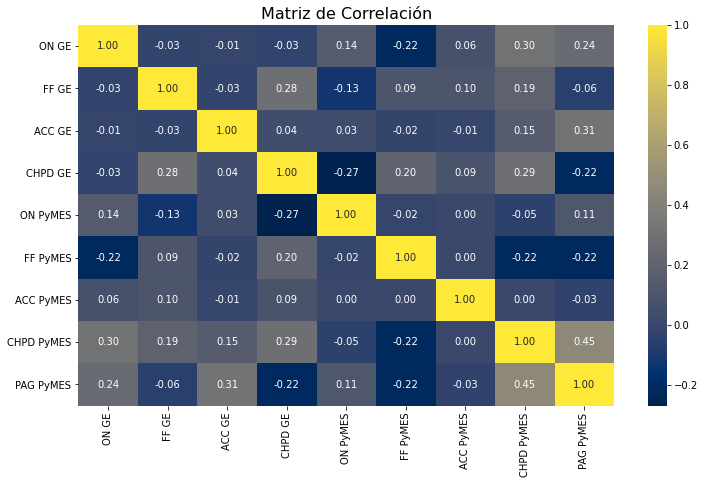

In [17]:
Cormat = df.corr()
Cormat

f, ax = plt.subplots(figsize=(12,7))
sns.heatmap(Cormat, vmax=1, square=False, annot=True, fmt=".2f", cmap="cividis")
plt.title("Matriz de Correlación", fontsize=16)

In [18]:
# Procedo a simplificar el heatmap a algo mas pequeño.
K = 5 # Definimos cuantas columnas me a seleccionar como las que son las mas correlacionadas.

In [19]:
cols = Cormat.nlargest(K, "ON GE")["ON GE"].index # Mas correlacionadas respecto a esa columna.

In [20]:
cols # Me va a decir las 5 variables mas relacionadas con PBI

Index(['ON GE', 'CHPD PyMES', 'PAG PyMES', 'ON PyMES', 'ACC PyMES'], dtype='object')

In [21]:
cm = np.corrcoef(df[cols].values.T)

In [22]:
cm

array([[ 1.        ,  0.29781381,  0.24185013,  0.13934235,  0.06433689],
       [ 0.29781381,  1.        ,  0.45124599, -0.04660858,  0.00370275],
       [ 0.24185013,  0.45124599,  1.        ,  0.11055261, -0.03430506],
       [ 0.13934235, -0.04660858,  0.11055261,  1.        ,  0.00363335],
       [ 0.06433689,  0.00370275, -0.03430506,  0.00363335,  1.        ]])

In [23]:
sns.set(font_scale=1.25) 
# font_scale = Tamaño de la fuente del grafico

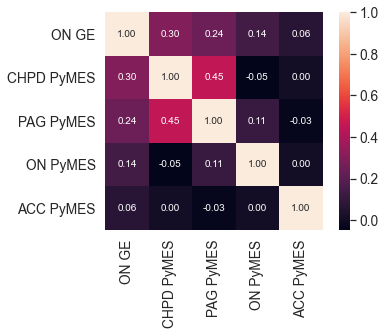

In [24]:
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size":10,}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Las correlaciones no son grandes entre los valores, son cercanos al 0. Como incluso si los valores son bajos estos pueden ser significativos, uso un "test de significancia estadistica" para ver si las correlaciones son verdaderamente despreciables o no.

#### En el analisis si los valores "p-values" son pequeños (<0.05), la correlación es significativa, aunque sea baja.



In [25]:
import scipy.stats as stats

corr_matrix = df.corr()
p_values = df.corr(method=lambda x, y: stats.pearsonr(x, y)[1])  # Obtiene p-values

print(p_values)

            ON GE  FF GE  ACC GE  CHPD GE  ON PyMES  FF PyMES  ACC PyMES  \
ON GE        1.00   0.73    0.85     0.67      0.06      0.00       0.38   
FF GE        0.73   1.00    0.73     0.00      0.09      0.21       0.19   
ACC GE       0.85   0.73    1.00     0.60      0.69      0.78       0.92   
CHPD GE      0.67   0.00    0.60     1.00      0.00      0.01       0.25   
ON PyMES     0.06   0.09    0.69     0.00      1.00      0.83       0.96   
FF PyMES     0.00   0.21    0.78     0.01      0.83      1.00       0.95   
ACC PyMES    0.38   0.19    0.92     0.25      0.96      0.95       1.00   
CHPD PyMES   0.00   0.01    0.04     0.00      0.53      0.00       0.96   
PAG PyMES    0.00   0.39    0.00     0.00      0.13      0.00       0.64   

            CHPD PyMES  PAG PyMES  
ON GE             0.00       0.00  
FF GE             0.01       0.39  
ACC GE            0.04       0.00  
CHPD GE           0.00       0.00  
ON PyMES          0.53       0.13  
FF PyMES          0.00 

#### No hay mucha correlación asi que opto por otro tipo de analisis, no se puede hacer una correlación lineal. Procedo a hacer grafico individual de cada columna para ver la dispersión y si sirve hacer un analisis polinomico o exponencial.

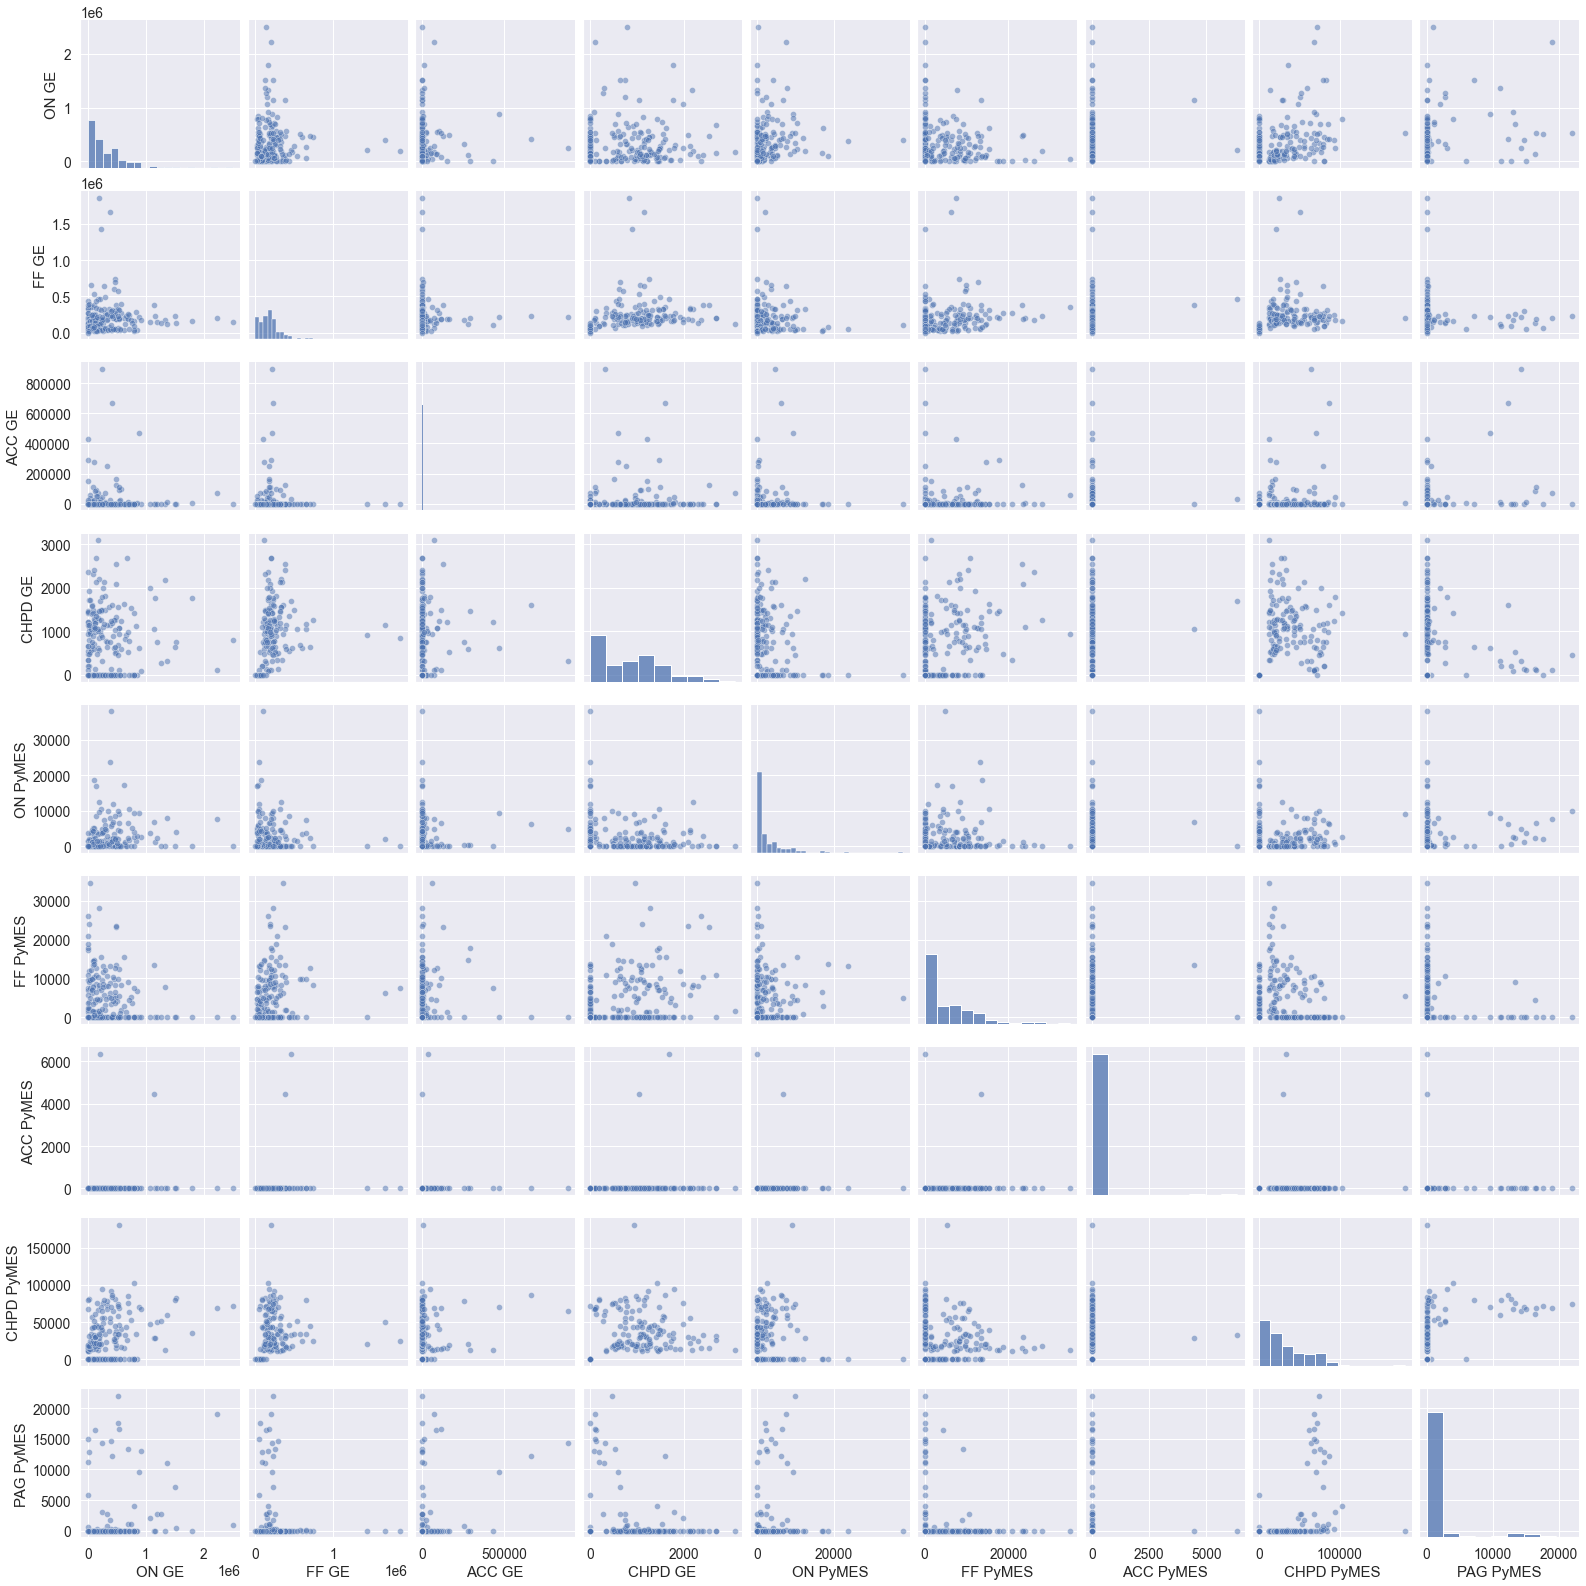

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, kind="scatter", plot_kws={'alpha':0.5})
plt.show()

In [28]:
df = df.drop(columns=['Fecha']) # Borro la columna FECHA para poder correr el grafico siguiente.

c:\users\hector\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


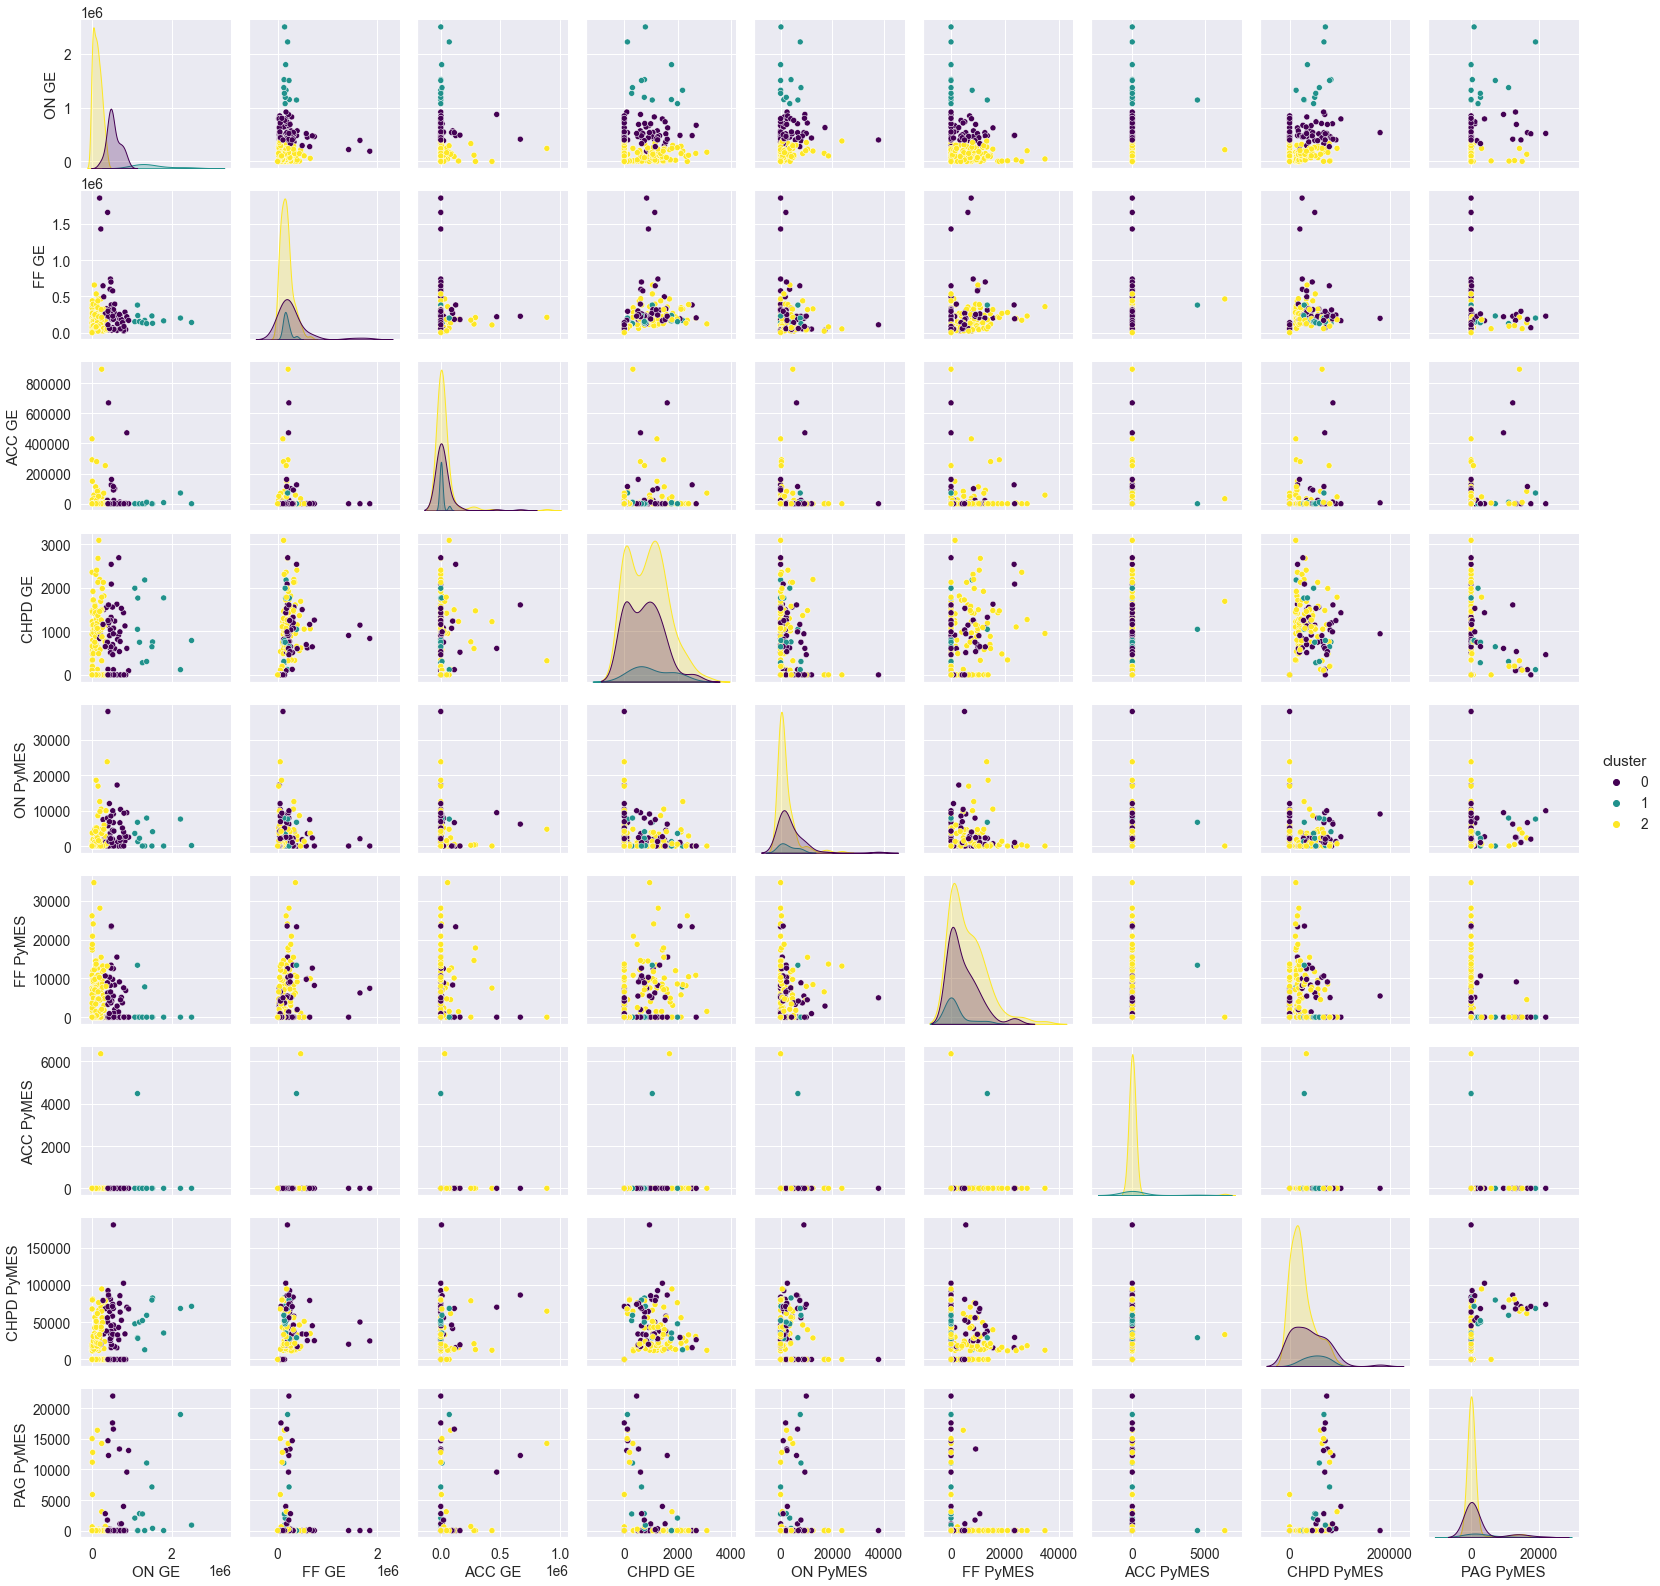

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df.dropna())

sns.pairplot(df, hue='cluster', palette="viridis")
plt.show()